Instructions for updating:
non-resource variables are not supported in the long term
[0.999, 1.00067, 0.99999]
[0.97697806, 1.0636646, 1.0002536]
[0.97806025, 1.1221797, 1.0008577]
[0.9794153, 1.1770307, 1.0014296]
[0.98069113, 1.2284524, 1.0019654]
[0.9818873, 1.2766608, 1.0024668]
[0.9830088, 1.3218573, 1.0029364]
[0.98406017, 1.3642292, 1.0033764]
[0.98504585, 1.4039532, 1.0037886]
[0.9859699, 1.4411944, 1.0041739]
[0.9868363, 1.4761088, 1.0045348]
[0.9876485, 1.5088409, 1.0048729]
[0.98841, 1.5395278, 1.005189]
[0.9891238, 1.5682969, 1.0054843]
[0.9897931, 1.5952688, 1.005762]
[0.99042064, 1.6205548, 1.0060201]
[0.991009, 1.6442604, 1.0062628]
[0.99156046, 1.6664846, 1.0064894]
[0.9920774, 1.6873201, 1.0067006]
[0.99256223, 1.7068534, 1.0068985]
[0.99301666, 1.7251655, 1.0070837]
[0.9934427, 1.742334, 1.0072566]
[0.9938422, 1.7584298, 1.0074183]
[0.9942167, 1.7735196, 1.0075696]
[0.9945679, 1.7876663, 1.0077115]
[0.9948971, 1.800929, 1.0078427]
[0.99520564, 1.813363, 1.0079646]
[0.

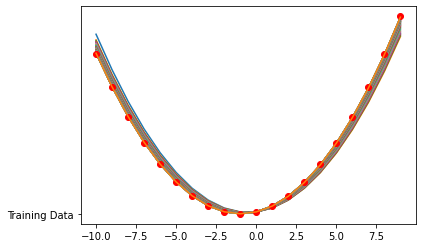

In [2]:
### QUADRATIC REGRESSION IN TENSORFLOW ###

# import tensorflow and pther necessary packages
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt
plt.interactive(False)

# Clearing whatever is saved so that we have a blank slate.
tf.reset_default_graph()

# Specify the type and shape of output data
input_data = tf.placeholder(dtype=tf.float32, shape=None)
output_data = tf.placeholder(dtype=tf.float32, shape=None)

# Identify variables to solve for
# m = tf.Variable(1, dtype=tf.float32)
# b = tf.Variable(1, dtype=tf.float32)
## ** For quadratic regression **
a = tf.Variable(1, dtype=tf.float32)
b = tf.Variable(1, dtype=tf.float32)
c = tf.Variable(1, dtype=tf.float32)

# Create the operation used to calculate the guess
# model_operation = m * input_data + b
# ** for quadratic regression **
model_operation = (a * (input_data ** 2)) + (b * input_data) + c # y = ax^2 + bx + c

d_i = model_operation - output_data
squared_error = tf.square(d_i)
loss = tf.reduce_mean(squared_error)


# Set the learning rate and tell the computer to minimize loss.
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# ** For quadratic regression
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)

train = optimizer.minimize(loss)

# x_values = [0, 1, 2, 3, 4]
# y_values = [2 * x + 1 for x in x_values]   # ==[1, 3, 5, 7, 9] --> y = 2x + 1
## ** For quadratic regression **
x_values = [x for x in range (-10, 10)]
y_values = [(x ** 2) + (2 * x) + 1 for x in x_values] # y = x^2 + 2x + 1

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(5000):
        sess.run(train, feed_dict={input_data:x_values, output_data:y_values})
        if i % 100 == 0:
            # print(sess.run([m, b]))
            ## ** For quadratic regression **
            print(sess.run([a, b, c]))
            plt.plot(x_values, sess.run(model_operation, feed_dict={input_data:x_values}))
            
    print(sess.run(loss, feed_dict={input_data:x_values, output_data:y_values}))
    
    plt.plot(x_values, y_values, 'ro', 'Training Data')
    plt.plot(x_values, sess.run(model_operation, feed_dict={input_data:x_values}))
    plt.show()